In [1]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('E:/Mini project/Dataset/new/Audio_Song_Actors_01-24/Actor_04/03-02-06-02-02-02-04.wav')

Populating the interactive namespace from numpy and matplotlib


C:\Users\acer\AppData\Local\Programs\Python\Python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['record', 'display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


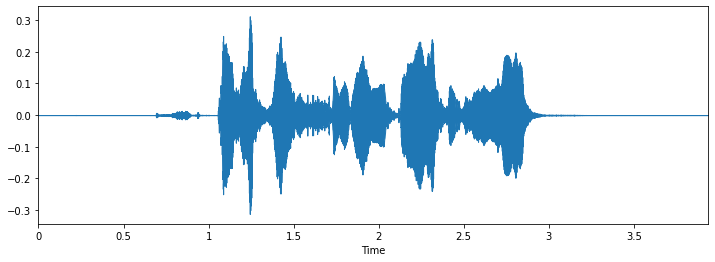

In [2]:
%pylab inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [4]:
import time
import os
path = 'E:/Mini project/Dataset/new/Audio_Song_Actors_01-24/'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 1287.771162033081 seconds ---


In [5]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [6]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((5252, 40), (5252,))

In [7]:
import joblib
# Saving joblib files to not load them again with the loop above

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = 'E:\Mini project\senior project\Speech-Emotion-Recognition-using-ML-and-DL-master\dataset_features1'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [8]:
# Loading saved models
import joblib
X = joblib.load('E:\Mini project\senior project\Speech-Emotion-Recognition-using-ML-and-DL-master\dataset_features1\X.joblib')
y = joblib.load('E:\Mini project\senior project\Speech-Emotion-Recognition-using-ML-and-DL-master\dataset_features1\y.joblib')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       192
           1       0.59      0.58      0.58       123
           2       0.61      0.60      0.61       264
           3       0.70      0.67      0.69       275
           4       0.72      0.66      0.69       252
           5       0.63      0.69      0.66       241
           6       0.67      0.70      0.69       197
           7       0.59      0.61      0.60       190

    accuracy                           0.66      1734
   macro avg       0.66      0.66      0.66      1734
weighted avg       0.67      0.66      0.66      1734



In [15]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [16]:
x_traincnn.shape, x_testcnn.shape

((3518, 40, 1), (1734, 40, 1))

In [17]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

C:\Users\acer\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\acer\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\acer\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 64)            384       
_________________________________________________________________
activation (Activation)      (None, 40, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_1 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0

In [19]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [20]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
220/220 [==============================] - 12s 35ms/step - loss: 4.6881 - accuracy: 0.1597 - val_loss: 1.9030 - val_accuracy: 0.3431
Epoch 2/200
220/220 [==============================] - 6s 25ms/step - loss: 2.6767 - accuracy: 0.2564 - val_loss: 1.6177 - val_accuracy: 0.4291
Epoch 3/200
220/220 [==============================] - 6s 26ms/step - loss: 1.9494 - accuracy: 0.3693 - val_loss: 1.3817 - val_accuracy: 0.5098
Epoch 4/200
220/220 [==============================] - 5s 25ms/step - loss: 1.6669 - accuracy: 0.4219 - val_loss: 1.2608 - val_accuracy: 0.5813
Epoch 5/200
220/220 [==============================] - 6s 27ms/step - loss: 1.4982 - accuracy: 0.5033 - val_loss: 1.1976 - val_accuracy: 0.5692
Epoch 6/200
220/220 [==============================] - 6s 27ms/step - loss: 1.3843 - accuracy: 0.5266 - val_loss: 1.1394 - val_accuracy: 0.6101
Epoch 7/200
220/220 [==============================] - 6s 27ms/step - loss: 1.2809 - accuracy: 0.5590 - val_loss: 1.1017 - val_accuracy

220/220 [==============================] - 5s 25ms/step - loss: 0.5935 - accuracy: 0.7792 - val_loss: 0.5736 - val_accuracy: 0.7866
Epoch 58/200
220/220 [==============================] - 6s 25ms/step - loss: 0.5605 - accuracy: 0.7967 - val_loss: 0.5867 - val_accuracy: 0.7872
Epoch 59/200
220/220 [==============================] - 5s 24ms/step - loss: 0.5886 - accuracy: 0.7826 - val_loss: 0.5899 - val_accuracy: 0.7797
Epoch 60/200
220/220 [==============================] - 5s 24ms/step - loss: 0.5678 - accuracy: 0.7953 - val_loss: 0.5721 - val_accuracy: 0.7982
Epoch 61/200
220/220 [==============================] - 5s 24ms/step - loss: 0.5518 - accuracy: 0.7891 - val_loss: 0.5742 - val_accuracy: 0.7797
Epoch 62/200
220/220 [==============================] - 5s 24ms/step - loss: 0.5594 - accuracy: 0.7948 - val_loss: 0.5940 - val_accuracy: 0.7837
Epoch 63/200
220/220 [==============================] - 5s 25ms/step - loss: 0.5747 - accuracy: 0.7871 - val_loss: 0.5761 - val_accuracy: 0.792

220/220 [==============================] - 5s 24ms/step - loss: 0.4434 - accuracy: 0.8404 - val_loss: 0.4977 - val_accuracy: 0.8241
Epoch 114/200
220/220 [==============================] - 5s 25ms/step - loss: 0.4389 - accuracy: 0.8282 - val_loss: 0.4861 - val_accuracy: 0.8195
Epoch 115/200
220/220 [==============================] - 5s 23ms/step - loss: 0.4297 - accuracy: 0.8398 - val_loss: 0.4935 - val_accuracy: 0.8183
Epoch 116/200
220/220 [==============================] - 5s 23ms/step - loss: 0.4135 - accuracy: 0.8484 - val_loss: 0.4829 - val_accuracy: 0.8241
Epoch 117/200
220/220 [==============================] - 5s 23ms/step - loss: 0.4131 - accuracy: 0.8521 - val_loss: 0.4863 - val_accuracy: 0.8212
Epoch 118/200
220/220 [==============================] - 5s 24ms/step - loss: 0.4084 - accuracy: 0.8401 - val_loss: 0.4766 - val_accuracy: 0.8281
Epoch 119/200
220/220 [==============================] - 5s 23ms/step - loss: 0.4295 - accuracy: 0.8403 - val_loss: 0.4863 - val_accuracy:

220/220 [==============================] - 5s 24ms/step - loss: 0.3478 - accuracy: 0.8698 - val_loss: 0.4693 - val_accuracy: 0.8328
Epoch 170/200
220/220 [==============================] - 5s 23ms/step - loss: 0.3083 - accuracy: 0.8878 - val_loss: 0.4382 - val_accuracy: 0.8437
Epoch 171/200
220/220 [==============================] - 5s 24ms/step - loss: 0.3322 - accuracy: 0.8844 - val_loss: 0.4580 - val_accuracy: 0.8420
Epoch 172/200
220/220 [==============================] - 5s 23ms/step - loss: 0.3312 - accuracy: 0.8774 - val_loss: 0.4455 - val_accuracy: 0.8443
Epoch 173/200
220/220 [==============================] - 5s 23ms/step - loss: 0.3134 - accuracy: 0.8858 - val_loss: 0.4464 - val_accuracy: 0.8374
Epoch 174/200
220/220 [==============================] - 5s 23ms/step - loss: 0.3298 - accuracy: 0.8858 - val_loss: 0.4356 - val_accuracy: 0.8408
Epoch 175/200
220/220 [==============================] - 5s 23ms/step - loss: 0.3133 - accuracy: 0.8837 - val_loss: 0.4490 - val_accuracy:

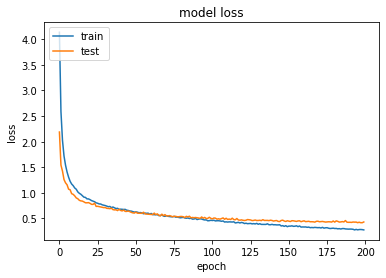

In [18]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

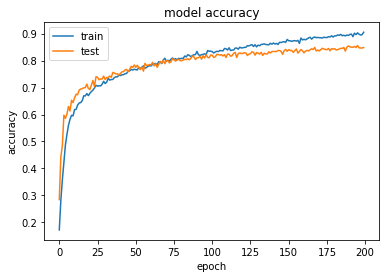

In [19]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
predictions = model.predict_classes(x_testcnn)

C:\Users\acer\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
predictions

array([3, 5, 3, ..., 1, 6, 2], dtype=int64)

In [22]:
y_test

array([3, 3, 3, ..., 1, 6, 2])

In [23]:
new_Ytest = y_test.astype(int)

In [24]:
new_Ytest

array([3, 3, 3, ..., 1, 6, 2])

In [25]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       192
           1       0.66      0.88      0.75       123
           2       0.89      0.79      0.84       264
           3       0.88      0.78      0.83       275
           4       0.86      0.92      0.89       252
           5       0.82      0.86      0.84       241
           6       0.78      0.91      0.84       197
           7       0.92      0.81      0.86       190

    accuracy                           0.85      1734
   macro avg       0.85      0.85      0.85      1734
weighted avg       0.86      0.85      0.85      1734



In [26]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[167  15   0   7   0   1   2   0]
 [  2 108   4   3   0   3   3   0]
 [  0  17 209   2  20   8   5   3]
 [  3  12   7 214   4  24   8   3]
 [  0   1   3   2 232   2  10   2]
 [  0   1   3  14   7 208   6   2]
 [  0   6   4   0   2   2 180   3]
 [  0   4   6   0   5   5  17 153]]


In [27]:
model.save('testing10_model1.h5')
print("MODEL SAVED")

MODEL SAVED


In [28]:

new_model=keras.models.load_model('testing10_model1.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 64)            384       
_________________________________________________________________
activation (Activation)      (None, 40, 64)            0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_1 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0

In [29]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

55/55 [==============================] - 1s 9ms/step - loss: 0.4319 - accuracy: 0.8483
Restored model, accuracy: 84.83%
